In [1]:
using RigorousInvariantMeasures
using Plots
using IntervalArithmetic
using LaTeXStrings
using Pkg
using StatsPlots
using TaylorModels

In [52]:
G(x) = mod(2*x+0.1*sin(2*pi*x),1)
D = mod1_dynamic(x->2*x+0.1*sin(2*pi*x))

Piecewise-defined dynamic with 2 branches

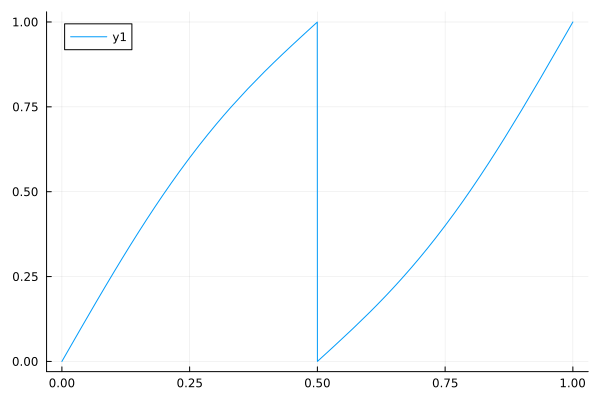

In [53]:
plot(D, 0, 1)

In [50]:
function orbit(f, x::Vector{T}, n) where {T} # this where T means that this is a parametric type
    k = length(x)
    v = Array{T, 2}(undef, (n, k)) 
    v[1, :] = x
    for i in 2:n
        x = f.(x)
        v[i, :] = x
    end
    return v
end

orbit (generic function with 1 method)

In [54]:
v = orbit(G, rand(Float64, 1000), 1000)

1000×1000 Matrix{Float64}:
 0.511607   0.51324    0.363741   …  0.102455  0.428658    0.112107
 0.015927   0.0181704  0.803014      0.264929  0.900656    0.28897
 0.0418446  0.0477329  0.511525      0.629418  0.742867    0.674957
 0.109679   0.12501    0.0158149     0.18619   0.385834    0.260826
 0.282945   0.320734   0.0415501     0.46445   0.837405    0.62142
 0.663755   0.731754   0.108911   …  0.951051  0.589516    0.173738
 0.241836   0.364165   0.281037      0.871829  0.125706    0.436213
 0.583541   0.803687   0.660178      0.671553  0.322435    0.91144
 0.116969   0.513009   0.235864      0.25501   0.734691    0.770063
 0.300992   0.0178528  0.571333      0.609971  0.369845    0.44092
 ⋮                                ⋱                        
 0.583783   0.347267   0.852892      0.806728  0.228818    0.579912
 0.117322   0.776434   0.625963      0.519742  0.556751    0.111697
 0.301863   0.454243   0.180789      0.027111  0.0785952   0.287955
 0.698463   0.936842   0.452271  

┌ Info: Saved animation to /home/joao/Downloads/Folder Julia/RigorousInvariantMeasures.jl-main/notebooks/tutorial_anim_fps30.gif
└ @ Plots /home/joao/.julia/packages/Plots/a3u1v/src/animation.jl:156


Plots.AnimatedGif("/home/joao/Downloads/Folder Julia/RigorousInvariantMeasures.jl-main/notebooks/tutorial_anim_fps30.gif")
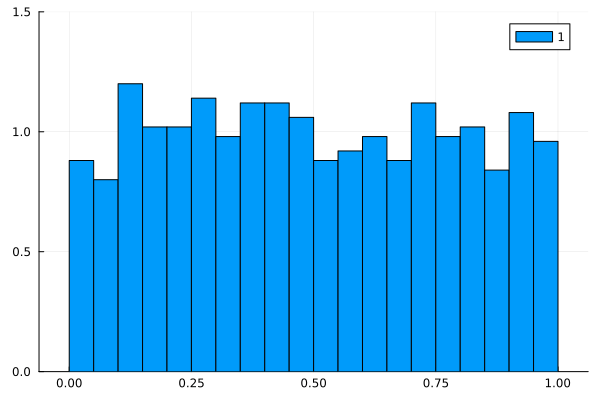

In [55]:
anim =  @animate for i in 1:1000
    histogram(v[i, :], bins = 40, label = "$i", normalize = true, ylims = (0, 1.5) )
end 
gif(anim, "tutorial_anim_fps30.gif", fps = 5)

In [56]:
ϕ(x) = x^2

ϕ (generic function with 1 method)

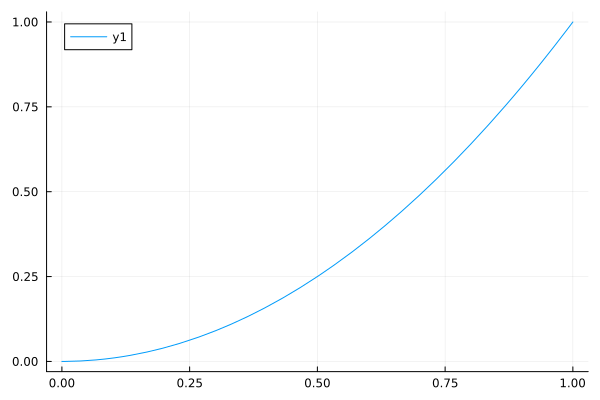

In [57]:
plot(ϕ,0,1)

In [58]:
function BirkhoffAverages(ϕ, v)
    w = ϕ.(v) # we evaluate the observables on the orbit
    k, n = size(w)
    z = accumulate(+, w; dims = 1) # this computes the accumulated sums along columns 
    t = [x for x in 1:k]
    z = z./t # we divide the first line by 1, the second by 2, the third by 3, etc...
    return z
end 

BirkhoffAverages (generic function with 1 method)

In [59]:
z = BirkhoffAverages(ϕ, v)

1000×1000 Matrix{Float64}:
 0.261741   0.263415   0.132308  0.105044  …  0.010497   0.183748  0.0125679
 0.130997   0.131873   0.38857   0.324523     0.0403421  0.497464  0.0480357
 0.0879153  0.0886746  0.346266  0.263333     0.15895    0.515593  0.183879
 0.0689439  0.0704128  0.259762  0.366169     0.127879   0.423912  0.154917
 0.0711666  0.0769043  0.208155  0.354024     0.145446   0.479379  0.201166
 0.132734   0.153331   0.175439  0.295904  …  0.271955   0.457404  0.172669
 0.122127   0.150372   0.16166   0.258783     0.341688   0.394318  0.175185
 0.149426   0.212314   0.195932  0.254366     0.35535    0.358024  0.257128
 0.134343   0.217966   0.180343  0.329031     0.323092   0.378218  0.294446
 0.129969   0.196201   0.194951  0.377413     0.327989   0.354075  0.284443
 ⋮                                         ⋱                       
 0.337421   0.33872    0.340637  0.330304     0.327243   0.332646  0.367875
 0.337095   0.338986   0.340689  0.33021      0.327185   0.332623  

┌ Info: Saved animation to /home/joao/Downloads/Folder Julia/RigorousInvariantMeasures.jl-main/notebooks/BirkhoffAverages.gif
└ @ Plots /home/joao/.julia/packages/Plots/a3u1v/src/animation.jl:156


Plots.AnimatedGif("/home/joao/Downloads/Folder Julia/RigorousInvariantMeasures.jl-main/notebooks/BirkhoffAverages.gif")
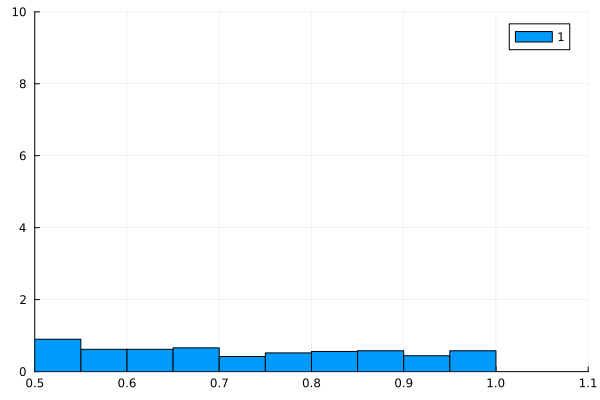

In [60]:
anim = @animate for i in 1:1000
    histogram(z[i, :], bins = 40, label = "$i", xlims = (0.5, 1.1), ylims = (0, 10), normalize = true)
end 
gif(anim, "BirkhoffAverages.gif", fps = 5)

In [61]:
B = Ulam(1000)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1001))

In [31]:
# Observable(B, ϕ, tol = 2^-10)

In [32]:
n = 1000
In = [interval(Float64(i), Float64(i+1))/n for i in 0:n-1]

1000-element Vector{Interval{Float64}}:
 [0, 0.00100001]
    [0.000999999, 0.00200001]
    [0.00199999, 0.00300001]
    [0.00299999, 0.00400001]
    [0.00399999, 0.00500001]
    [0.00499999, 0.00600001]
    [0.00599999, 0.00700001]
    [0.00699999, 0.00800001]
    [0.00799999, 0.00900001]
    [0.00899999, 0.0100001]
     ⋮
    [0.990999, 0.992001]
    [0.991999, 0.993001]
    [0.992999, 0.994001]
    [0.993999, 0.995001]
    [0.994999, 0.996001]
    [0.995999, 0.997001]
    [0.996999, 0.998001]
    [0.997999, 0.999001]
    [0.998999, 1]

In [39]:
ϕ1 = [ϕ(Taylor1([x, 1], 100))[0] for x in In]

1000-element Vector{Interval{Float64}}:
 [0, 1.00001e-06]
    [9.99999e-07, 4.00001e-06]
    [3.99999e-06, 9.00001e-06]
    [8.99999e-06, 1.60001e-05]
    [1.59999e-05, 2.50001e-05]
    [2.49999e-05, 3.60001e-05]
    [3.59999e-05, 4.90001e-05]
    [4.89999e-05, 6.40001e-05]
    [6.39999e-05, 8.10001e-05]
    [8.09999e-05, 0.000100001]
     ⋮
    [0.98208, 0.984065]
    [0.984063, 0.98605]
    [0.986048, 0.988037]
    [0.988035, 0.990026]
    [0.990024, 0.992017]
    [0.992015, 0.99401]
    [0.994008, 0.996005]
    [0.996003, 0.998002]
    [0.998, 1]

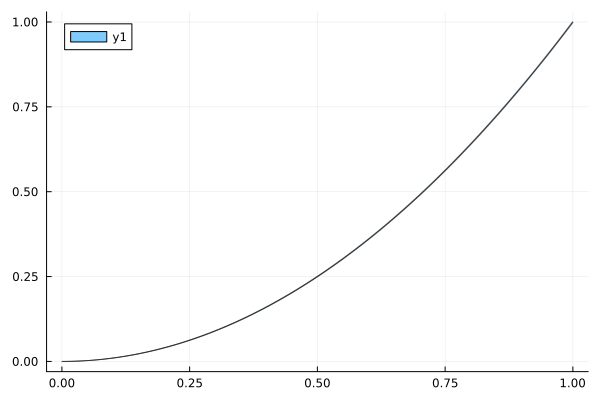

In [40]:
rect = In .× ϕ1 
plot(rect)

#### Lets search the densite for discretazion of observable

In [62]:
Q = DiscretizedOperator(B, D)

┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/joao/.julia/packages/RigorousInvariantMeasures/D0lUF/src/GenericAssembler.jl:145


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 3, 4, 5, 6, 6, 7, 8  …  993, 994, 995, 995, 996, 997, 998, 998, 999, 1000], [1, 1, 1, 2, 2, 2, 2, 3, 3, 3  …  998, 998, 998, 999, 999, 999, 999, 1000, 1000, 1000], Interval{Float64}[[0.380471, 0.380472], [0.380471, 0.380472], [0.239056, 0.239057], [0.141416, 0.141417], [0.380474, 0.380475], [0.380476, 0.380477], [0.0976322, 0.0976323], [0.282847, 0.282848], [0.380482, 0.380483], [0.33667, 0.336671]  …  [0.33667, 0.336671], [0.380482, 0.380483], [0.282847, 0.282848], [0.0976322, 0.0976323], [0.380476, 0.380477], [0.380474, 0.380475], [0.141416, 0.141417], [0.239056, 0.239057], [0.380471, 0.380472], [0.380471, 0.380472]], 1000, 1000))

In [69]:
norms = powernormbounds(B, D; Q=Q)

64-element Vector{Float64}:
 1.000000000009326
 1.0000000000186524
 1.0000000000279787
 1.000000000037305
 1.0000000000466314
 1.0000000000559577
 1.000000000065284
 1.0000000000746103
 1.0000000000839366
 1.000000000093263
 ⋮
 1.206113028441759e-7
 1.2061130284530074e-7
 6.413970612626918e-8
 3.120260776728642e-8
 1.517940742607132e-8
 6.182377056458103e-9
 3.0075954196354802e-9
 1.5233087110064646e-9
 5.959145804780257e-10

In [66]:
w = invariant_vector(B, Q)

1000-element Vector{Float64}:
 1.0923068745751436
 1.0923264864600413
 1.09232067143316
 1.0922732835513094
 1.0923505315872717
 1.0922666123115674
 1.0921882084472334
 1.0922673988622387
 1.0920684968968466
 1.092038119098342
 ⋮
 1.0920684968967025
 1.0922673988622518
 1.0921882084472658
 1.0922666123114861
 1.0923505315871898
 1.0922732835513431
 1.0923206714330747
 1.0923264864600002
 1.0923068745751545

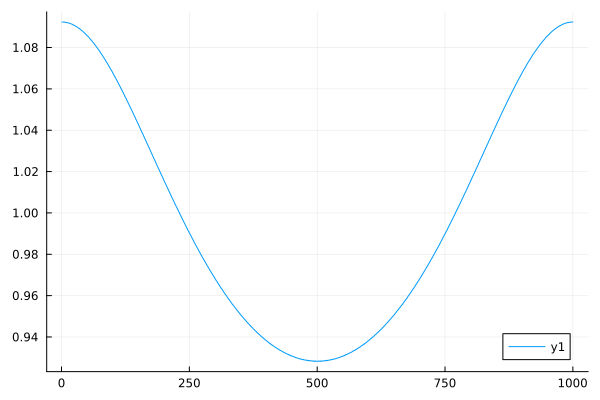

In [67]:
plot(w)

In [68]:
obserident = ϕ.(w)

1000-element Vector{Float64}:
 1.1931343082441186
 1.1931771530221387
 1.1931644492401894
 1.1930609259599592
 1.193229683858995
 1.1930463523705879
 1.1928750826711774
 1.1930480706172808
 1.192613601914538
 1.1925472535638444
 ⋮
 1.192613601914223
 1.1930480706173094
 1.1928750826712482
 1.1930463523704105
 1.1932296838588161
 1.1930609259600329
 1.193164449240003
 1.193177153022049
 1.1931343082441423

#### Here just make $\int{obserident}$

In [78]:
Pkg.add("QuadGK")
using QuadGK

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [1fd47b50] + QuadGK v2.9.4
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [76]:
integrateobservable(B,obserident,w,2^-10)

MethodError: MethodError: no method matching integrateobservable(::Ulam{LinRange{Float64, Int64}}, ::Vector{Float64}, ::Vector{Float64}, ::Float64)

Closest candidates are:
  integrateobservable(::Ulam, !Matched::Observable, ::Vector, ::Any)
   @ RigorousInvariantMeasures ~/.julia/packages/RigorousInvariantMeasures/D0lUF/src/Observables.jl:187
